# Team 8

Question2: Is there a threshold in age gap size beyond which gender ordering becomes systematically asymmetric, indicating a shift in how relationships are portrayed?

Name: Pin-Chu Yin

# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-14/age_gaps.csv"
age_gaps = pd.read_csv(url)

age_gaps.columns = age_gaps.columns.str.lower()

# parse dates
date_cols = [c for c in age_gaps.columns if "birthdate" in c]
for c in date_cols:
    age_gaps[c] = pd.to_datetime(age_gaps[c], errors="coerce")

age_gaps.info()
age_gaps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_name          1155 non-null   object        
 1   release_year        1155 non-null   int64         
 2   director            1155 non-null   object        
 3   age_difference      1155 non-null   int64         
 4   couple_number       1155 non-null   int64         
 5   actor_1_name        1155 non-null   object        
 6   actor_2_name        1155 non-null   object        
 7   character_1_gender  1155 non-null   object        
 8   character_2_gender  1155 non-null   object        
 9   actor_1_birthdate   1155 non-null   datetime64[ns]
 10  actor_2_birthdate   1155 non-null   datetime64[ns]
 11  actor_1_age         1155 non-null   int64         
 12  actor_2_age         1155 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


# Data Processing

In [ ]:
age_gaps.isna().sum()

,0
movie_name,0
release_year,0
director,0
age_difference,0
couple_number,0
actor_1_name,0
actor_2_name,0
character_1_gender,0
character_2_gender,0
actor_1_birthdate,0


In [ ]:
age_gaps.describe()

,release_year,age_difference,couple_number,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
count,1155.000000,1155.000000,1155.000000,1155,1155,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,1960-09-07 07:15:07.012987008,1971-01-29 13:09:11.688311688,40.635498,30.211255
min,1935.000000,0.000000,1.000000,1889-04-16 00:00:00,1906-10-06 00:00:00,18.000000,17.000000
25%,1997.000000,4.000000,1.000000,1953-05-16 00:00:00,1965-03-25 00:00:00,33.000000,25.000000
50%,2004.000000,8.000000,1.000000,1964-10-03 00:00:00,1974-07-30 00:00:00,39.000000,29.000000
75%,2012.000000,15.000000,2.000000,1973-08-07 12:00:00,1982-04-07 00:00:00,47.000000,34.000000
max,2022.000000,52.000000,7.000000,1996-06-01 00:00:00,1996-11-11 00:00:00,81.000000,68.000000
std,16.365819,8.511086,0.754419,NaN,NaN,10.424173,7.495952


I add a new feature:
- release_to_2026
- younger_age
- order_age
- older_gender
- meam_age
- relative_age

In [ ]:
# copy age_gaps
age_gaps_copy = age_gaps.copy()
# drop column = 'movie_name', 'director', 'couple_number', 'actor_1_name', 'actor_2_name', 'actor_1_birthdate', 'actor_2_birthdate' in age_gaps
age_gaps_copy = age_gaps_copy.drop(columns=['movie_name', 'director', 'actor_1_name','actor_2_name', 'actor_1_birthdate', 'actor_2_birthdate'])
# add a new column named "release to 2026" (2026 - release_year)
age_gaps_copy['release_to_2026'] = 2026 - age_gaps_copy['release_year']

# compare actor_1_age, actor_2_age from each row and assign the gender who has higher number is in age
age_gaps_copy['younger_age'] = age_gaps_copy[['actor_1_age', 'actor_2_age']].min(axis=1)
age_gaps_copy['order_age'] = age_gaps_copy[['actor_1_age', 'actor_2_age']].max(axis=1)

age_gaps_copy['older_gender'] = np.where(
    age_gaps_copy['actor_1_age'] > age_gaps_copy['actor_2_age'], age_gaps_copy['character_1_gender'],
    np.where(
        age_gaps_copy['actor_2_age'] > age_gaps_copy['actor_1_age'], age_gaps_copy['character_2_gender'],
        'same_age'))

import pandas as pd

age_gaps_copy['age_diff_group'] = pd.cut(
    age_gaps_copy['age_difference'],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100],
    labels=[10, 20, 30, 40, 50, 60, 70, 80, 90,100],
    right=True,     # 10 代表 (0,10]
    include_lowest=True
)

# add a column named 'mean_age' = (younger_age+order_age)/2
age_gaps_copy['mean_age'] = (age_gaps_copy['younger_age'] + age_gaps_copy['order_age'])/2

# add new column named " relative_age_gap"
age_gaps_copy['relative_age_gap'] = age_gaps_copy['age_difference']/age_gaps_copy['younger_age']

age_gaps_clean = age_gaps_copy.drop(columns=['actor_1_age', 'actor_2_age'])
age_gaps_clean.head().reset_index()

,index,release_year,age_difference,couple_number,character_1_gender,character_2_gender,release_to_2026,younger_age,order_age,older_gender,age_diff_group,mean_age,relative_age_gap
0,0,1971,52,1,woman,man,55,23,75,woman,60,49.0,2.260870
1,1,2006,50,1,man,woman,20,24,74,man,50,49.0,2.083333
2,2,2002,49,1,man,woman,24,20,69,man,50,44.5,2.450000
3,3,1998,45,1,man,woman,28,23,68,man,50,45.5,1.956522
4,4,2010,43,1,man,man,16,38,81,man,50,59.5,1.131579


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

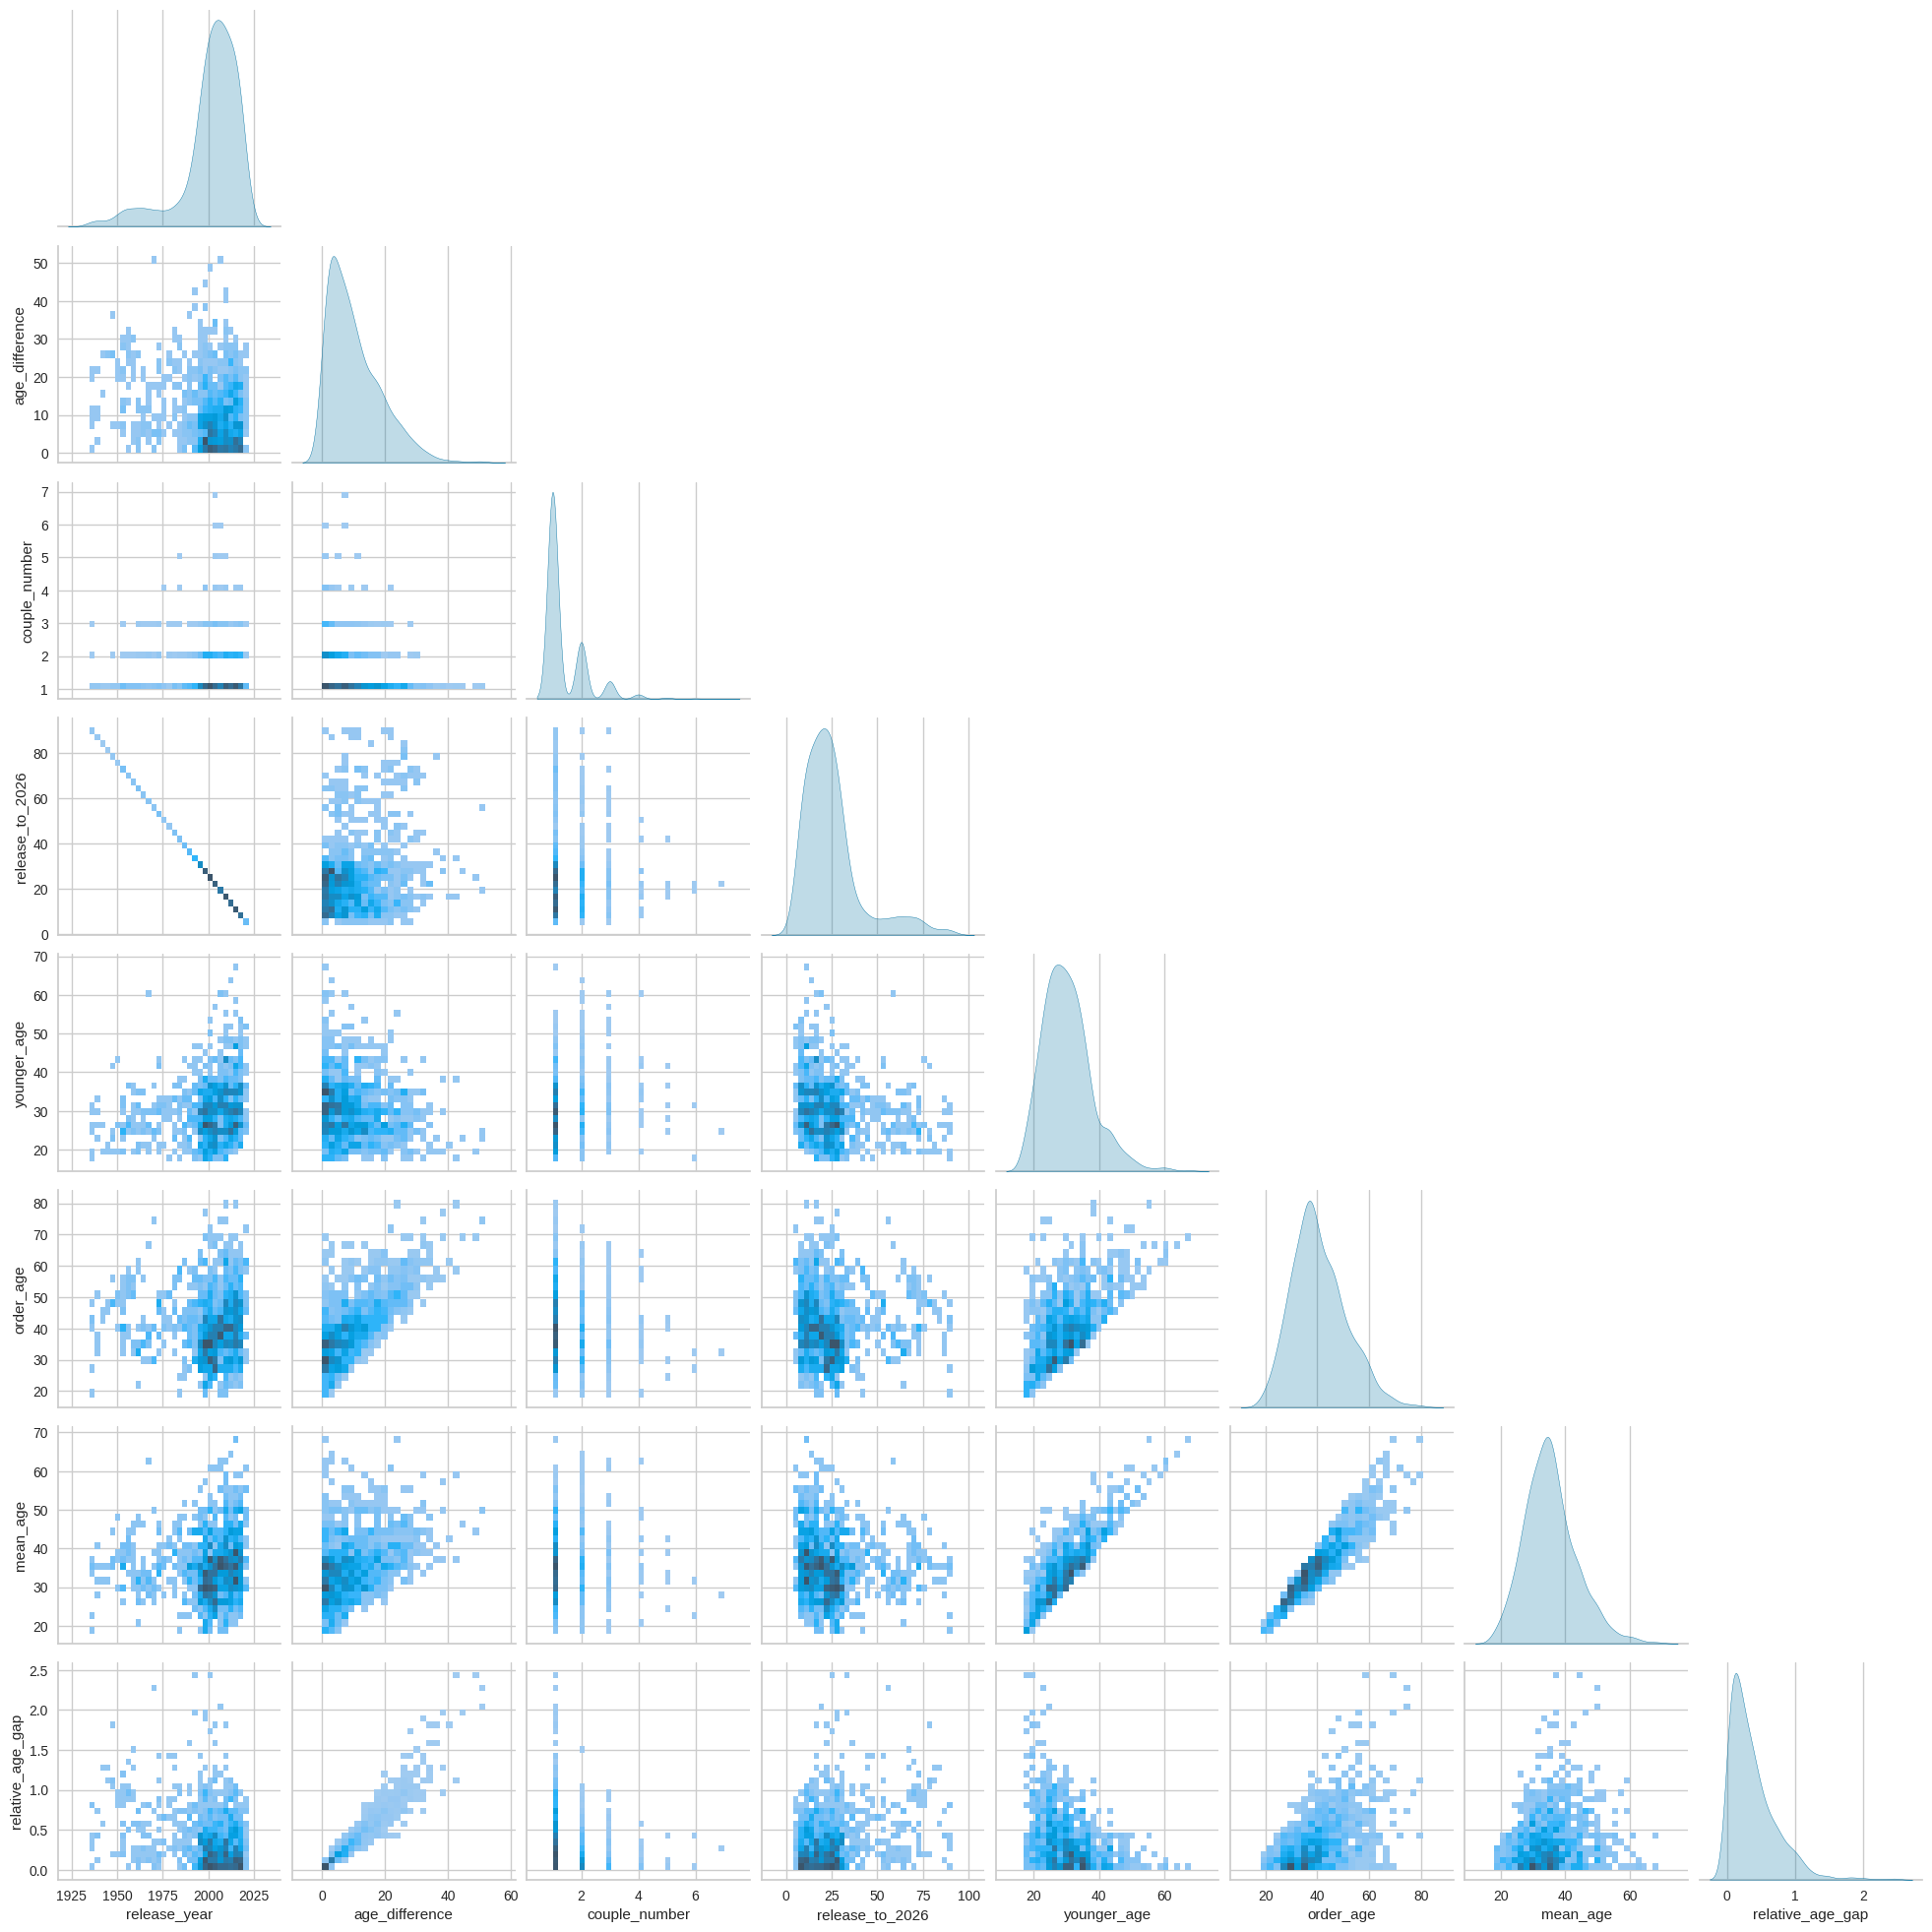

In [ ]:
sns.pairplot(age_gaps_clean, kind="hist", diag_kind="kde", corner=True)

In [ ]:
import pandas as pd

heatmap_df = pd.crosstab(
    age_gaps_clean['age_diff_group'],
    age_gaps_clean['older_gender'],
    normalize='index'   # 每個 age group 內的比例
) * 100

heatmap_df


older_gender,man,same_age,woman
age_diff_group,,,
10,71.345876,4.341534,24.312590
20,93.247588,0.000000,6.752412
30,95.967742,0.000000,4.032258
40,95.652174,0.000000,4.347826
50,100.000000,0.000000,0.000000
60,0.000000,0.000000,100.000000


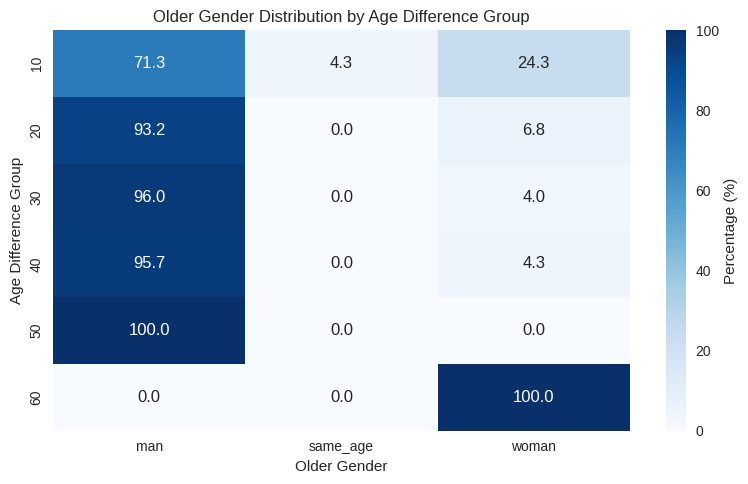

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar_kws={"label": "Percentage (%)"}
)

plt.title("Older Gender Distribution by Age Difference Group")
plt.xlabel("Older Gender")
plt.ylabel("Age Difference Group")

plt.tight_layout()
plt.show()


In [ ]:
# count how many unique value in director from age_gap datafram and list all the unique value
director_count = age_gaps['director'].unique()
director_count

array(['Hal Ashby', 'Roger Michell', 'Phillip Noyce', 'Joel Coen',
       'Mike Mills', 'Katt Shea', 'Woody Allen', 'Jon Amiel',
       'Paul Thomas Anderson', 'Steven Spielberg', 'Irving Pichel',
       'Jerry Zucker', 'Nancy Meyers', 'Michel Gondry', 'Sofia Coppola',
       'Anand Tucker', 'Jonathan Lynn', 'Daniel Petrie', 'Jean Negulesco',
       'Adrian Lyne', 'John Curran', 'Rebecca Miller', 'Paul Haggis',
       'Isabel Coixet', 'John Glen', 'Tony Scott', 'Stanley Donen',
       'Melville Shavelson', 'Don Michael Paul', 'Billy Wilder',
       'Joseph L. Mankiewicz', 'Tom Ford', 'Nicholas Jarecki',
       'Warren Beatty', 'David Fincher', 'Ang Lee', 'Martin Scorsese',
       'Andrew Davis', 'John Huston', 'Scott Cooper', 'Ruben Fleischer',
       'Fred Zinnemann', 'Bernardo Bertolucci', 'undefined',
       'Peter Sollett', 'Ivan Reitman', 'Gary Winick', 'Julian Farino',
       'Noah Baumbach', 'David Koepp', 'James L. Brooks',
       'Steven Soderbergh', 'Lee Tamahori', 'Charles W

## Feature Normalization

Because the ranges of the features differ substantially and the units are not consistent, feature normalization was applied to prevent any single feature from dominating the distance calculations

In [ ]:
from sklearn.preprocessing import StandardScaler


feature_cols = ['mean_age', 'relative_age_gap']

X = age_gaps_copy[feature_cols]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=feature_cols,
    index=age_gaps_copy.index
)

X_scaled_df.head()

,mean_age,relative_age_gap
0,1.693628,5.471972
1,1.693628,4.956601
2,1.132271,6.020999
3,1.257017,4.588479
4,3.003460,2.193749


## Hierarchical Clustering

In [ ]:
data_hiera = age_gaps_copy.copy()

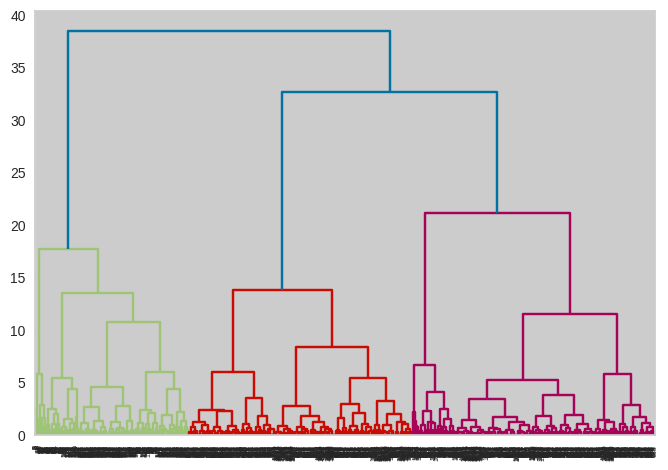

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Z_ward = linkage(X_scaled, 'ward') #You may try different methods and distance metrics.
tree_2 = dendrogram(Z_ward,)

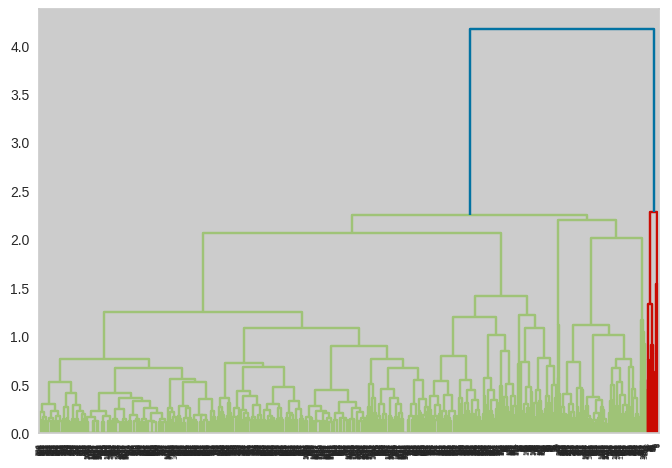

In [ ]:
Z_average = linkage(X_scaled, 'average') #You may try different methods and distance metrics.
tree_2 = dendrogram(Z_average,)

/tmp/ipython-input-3457659015.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/tmp/ipython-input-3457659015.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


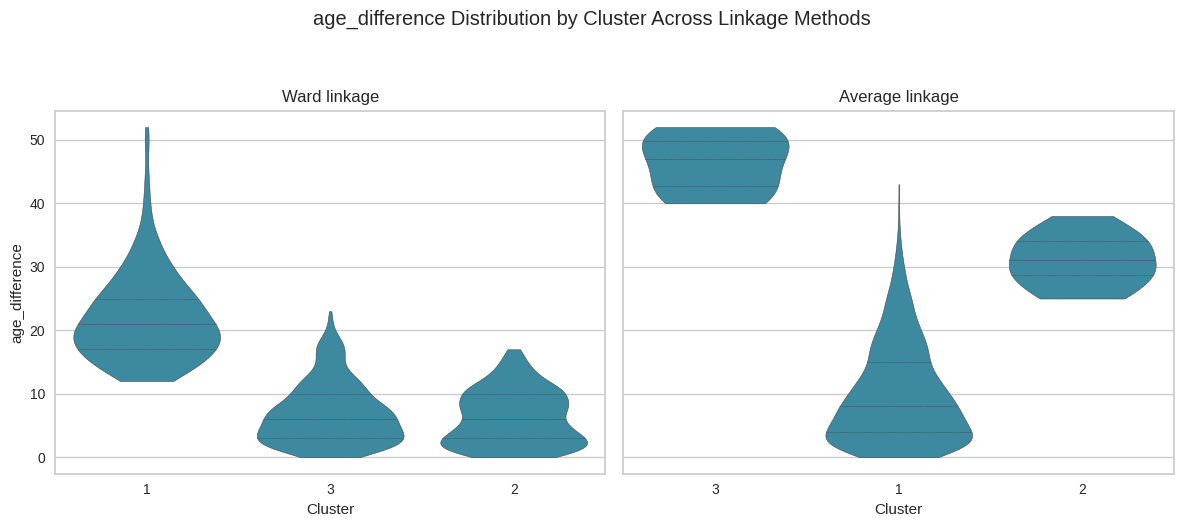

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster


df = age_gaps_copy.copy()
y_var = "age_difference"
feature_cols = ["mean_age", "relative_age_gap"]
n_clusters = 3
work_df = df.dropna(subset=feature_cols + [y_var]).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(work_df[feature_cols].to_numpy())

Z_ward = linkage(X_scaled, method="ward")
Z_avg  = linkage(X_scaled, method="average")

work_df["cluster_ward"] = fcluster(Z_ward, t=n_clusters, criterion="maxclust").astype(str)
work_df["cluster_avg"]  = fcluster(Z_avg,  t=n_clusters, criterion="maxclust").astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

linkages = [
    ("cluster_ward", "Ward linkage"),
    ("cluster_avg", "Average linkage"),
]

for ax, (col, title) in zip(axes, linkages):
    sns.violinplot(
        data=work_df,
        x=col,
        y=y_var,
        inner="quartile",
        cut=0,
        scale="width",
        color="#2c92b1",
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("Cluster")

axes[0].set_ylabel(y_var)

plt.suptitle(
    f"{y_var} Distribution by Cluster Across Linkage Methods",
    y=1.05
)
plt.tight_layout()
plt.show()

**Silhuette Score**

Try different number of clusters to see which number of clusters has higher score.

I tried number of 2, 3 and 4. 3 has best performance.

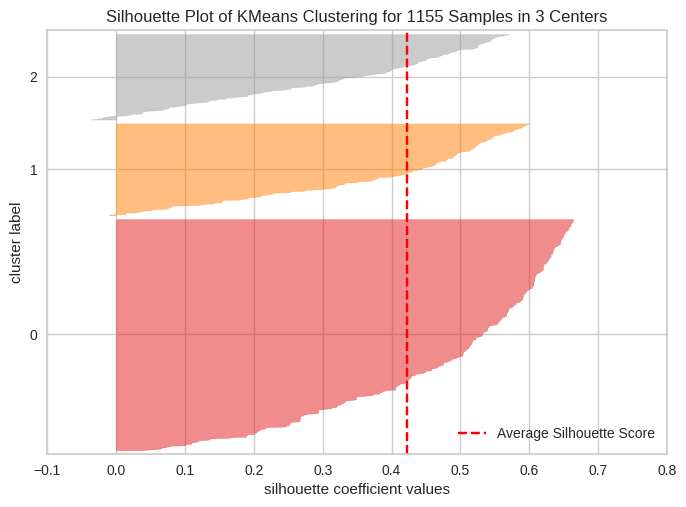

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1155 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
n_clusters_kmeans = 3

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

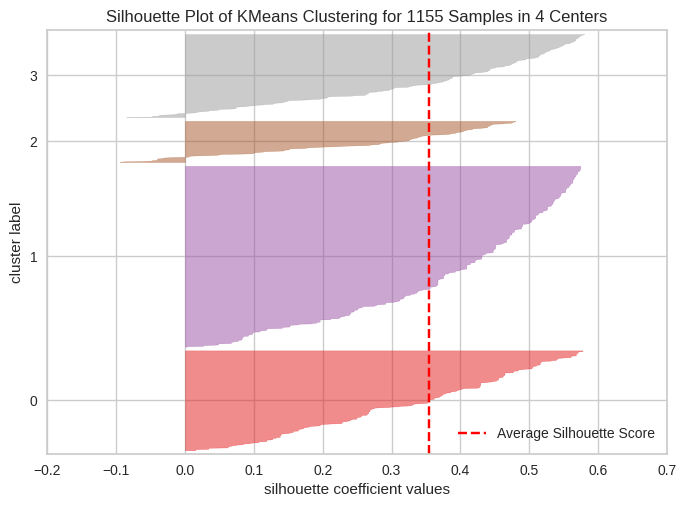

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1155 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
n_clusters_kmeans = 4

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

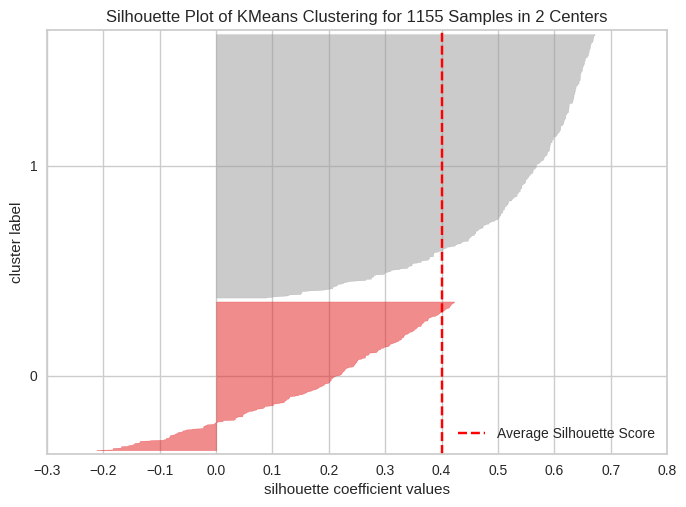

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1155 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
n_clusters_kmeans = 2

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
n_clusters = 3
data_hiera['cluster_labels'] = fcluster(Z_average, n_clusters, criterion='maxclust').astype(str)
data_hiera

,release_year,age_difference,couple_number,character_1_gender,character_2_gender,actor_1_age,actor_2_age,release_to_2026,younger_age,order_age,older_gender,mean_age,relative_age_gap,cluster_labels
0,1971,52,1,woman,man,75,23,55,23,75,woman,49.0,2.260870,3
1,2006,50,1,man,woman,74,24,20,24,74,man,49.0,2.083333,3
2,2002,49,1,man,woman,69,20,24,20,69,man,44.5,2.450000,3
3,1998,45,1,man,woman,68,23,28,23,68,man,45.5,1.956522,3
4,2010,43,1,man,man,81,38,16,38,81,man,59.5,1.131579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2013,0,1,man,woman,23,23,13,23,23,same_age,23.0,0.000000,1
1151,2006,0,1,woman,man,42,42,20,42,42,same_age,42.0,0.000000,1
1152,2019,0,1,woman,man,30,30,7,30,30,same_age,30.0,0.000000,1
1153,2007,0,1,woman,man,21,21,19,21,21,same_age,21.0,0.000000,1


In [ ]:
data_hiera['cluster_labels'].value_counts()

,count
cluster_labels,
1,1133
2,16
3,6


In [ ]:
data_hiera.groupby('cluster_labels')['age_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_labels,,,,,,,,
1,1133.0,9.943513,7.777061,0.0,4.00,8.0,15.00,43.0
2,16.0,31.000000,4.016632,25.0,28.75,31.0,34.00,38.0
3,6.0,46.333333,4.760952,40.0,42.75,47.0,49.75,52.0


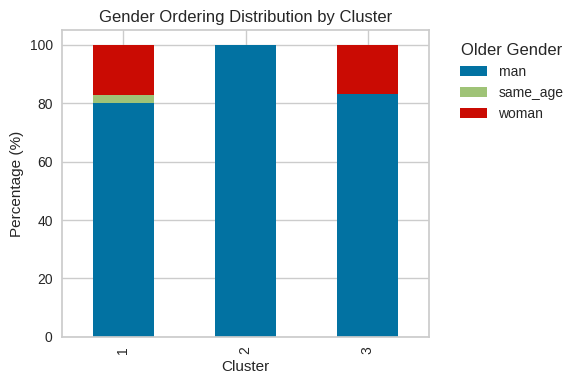

In [ ]:
import matplotlib.pyplot as plt

gender_pct = (
    pd.crosstab(data_hiera['cluster_labels'], data_hiera['older_gender'], normalize='index')
    * 100
)

gender_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4)
)

plt.ylabel('Percentage (%)')
plt.xlabel('Cluster')
plt.title('Gender Ordering Distribution by Cluster')
plt.legend(title='Older Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-375687973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_hiera, x='cluster_labels', y="age_difference", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='age_difference'>

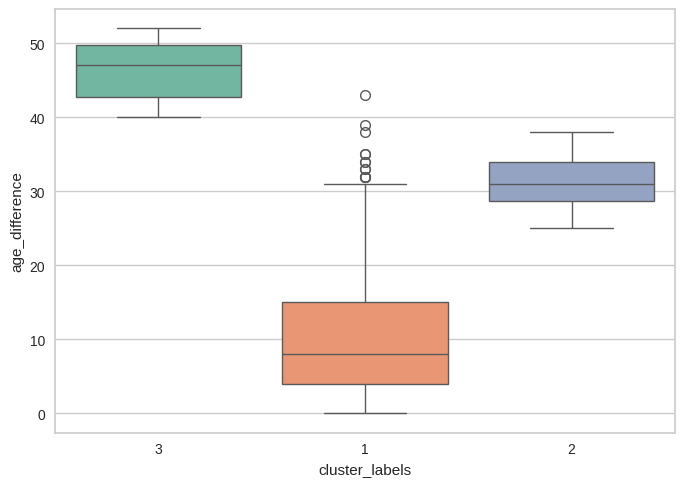

In [ ]:
sns.boxplot(data=data_hiera, x='cluster_labels', y="age_difference", palette="Set2")

/tmp/ipython-input-924421717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_hiera, x='cluster_labels', y="mean_age", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='mean_age'>

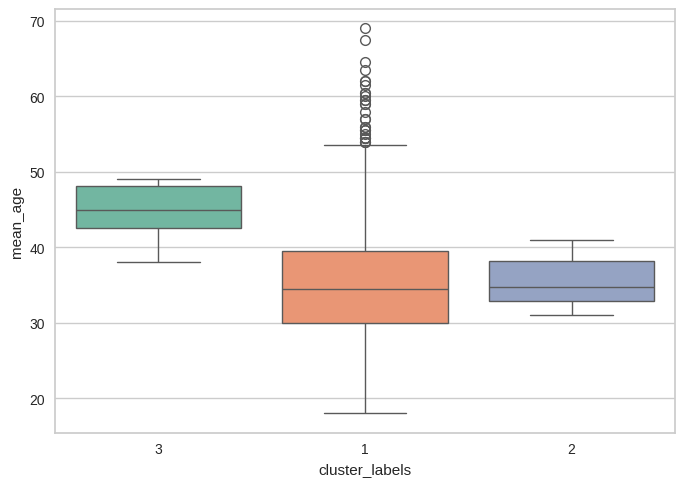

In [ ]:
sns.boxplot(data=data_hiera, x='cluster_labels', y="mean_age", palette="Set2")

## K-Mean


In [ ]:
X_scaled_k=X_scaled_df.drop(columns=['cluster_labels'])

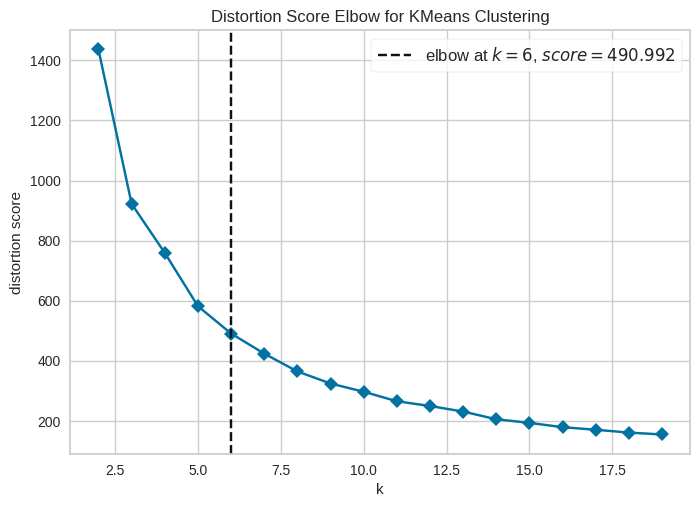

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(X_scaled_k)        # Fit the data to the visualizer
visualizer.show()

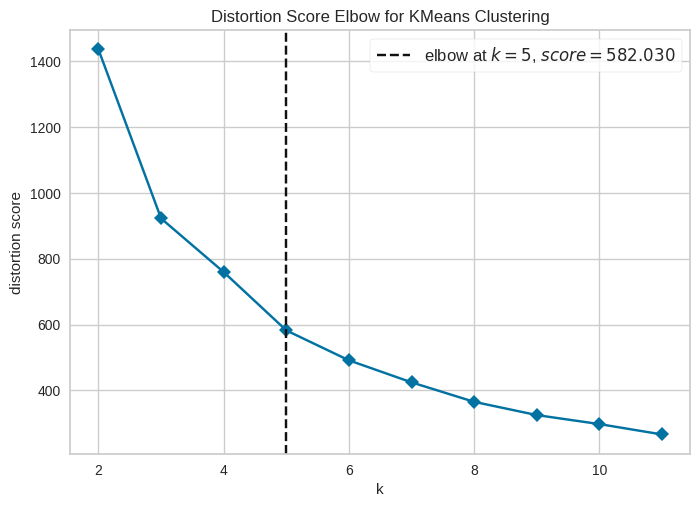

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 12), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(X_scaled_k)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
n_clusters_kmeans = 4

In [ ]:
data_k=age_gaps_copy.copy()
data_k=data_k.drop(columns=['character_1_gender',	'character_2_gender', 'couple_number', 'actor_1_age',	'actor_2_age'])

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters and random_state=42
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42) # Trye different number of clusters

# Fit the model and predict cluster labels, excluding the existing 'cluster_labels' column
data_k['cluster_labels'] = kmeans.fit_predict(X_scaled_df).astype(str)

# Display the value counts of the new cluster labels
data_k['cluster_labels'].value_counts().sort_index()

,count
cluster_labels,
0,279
1,238
2,112
3,526


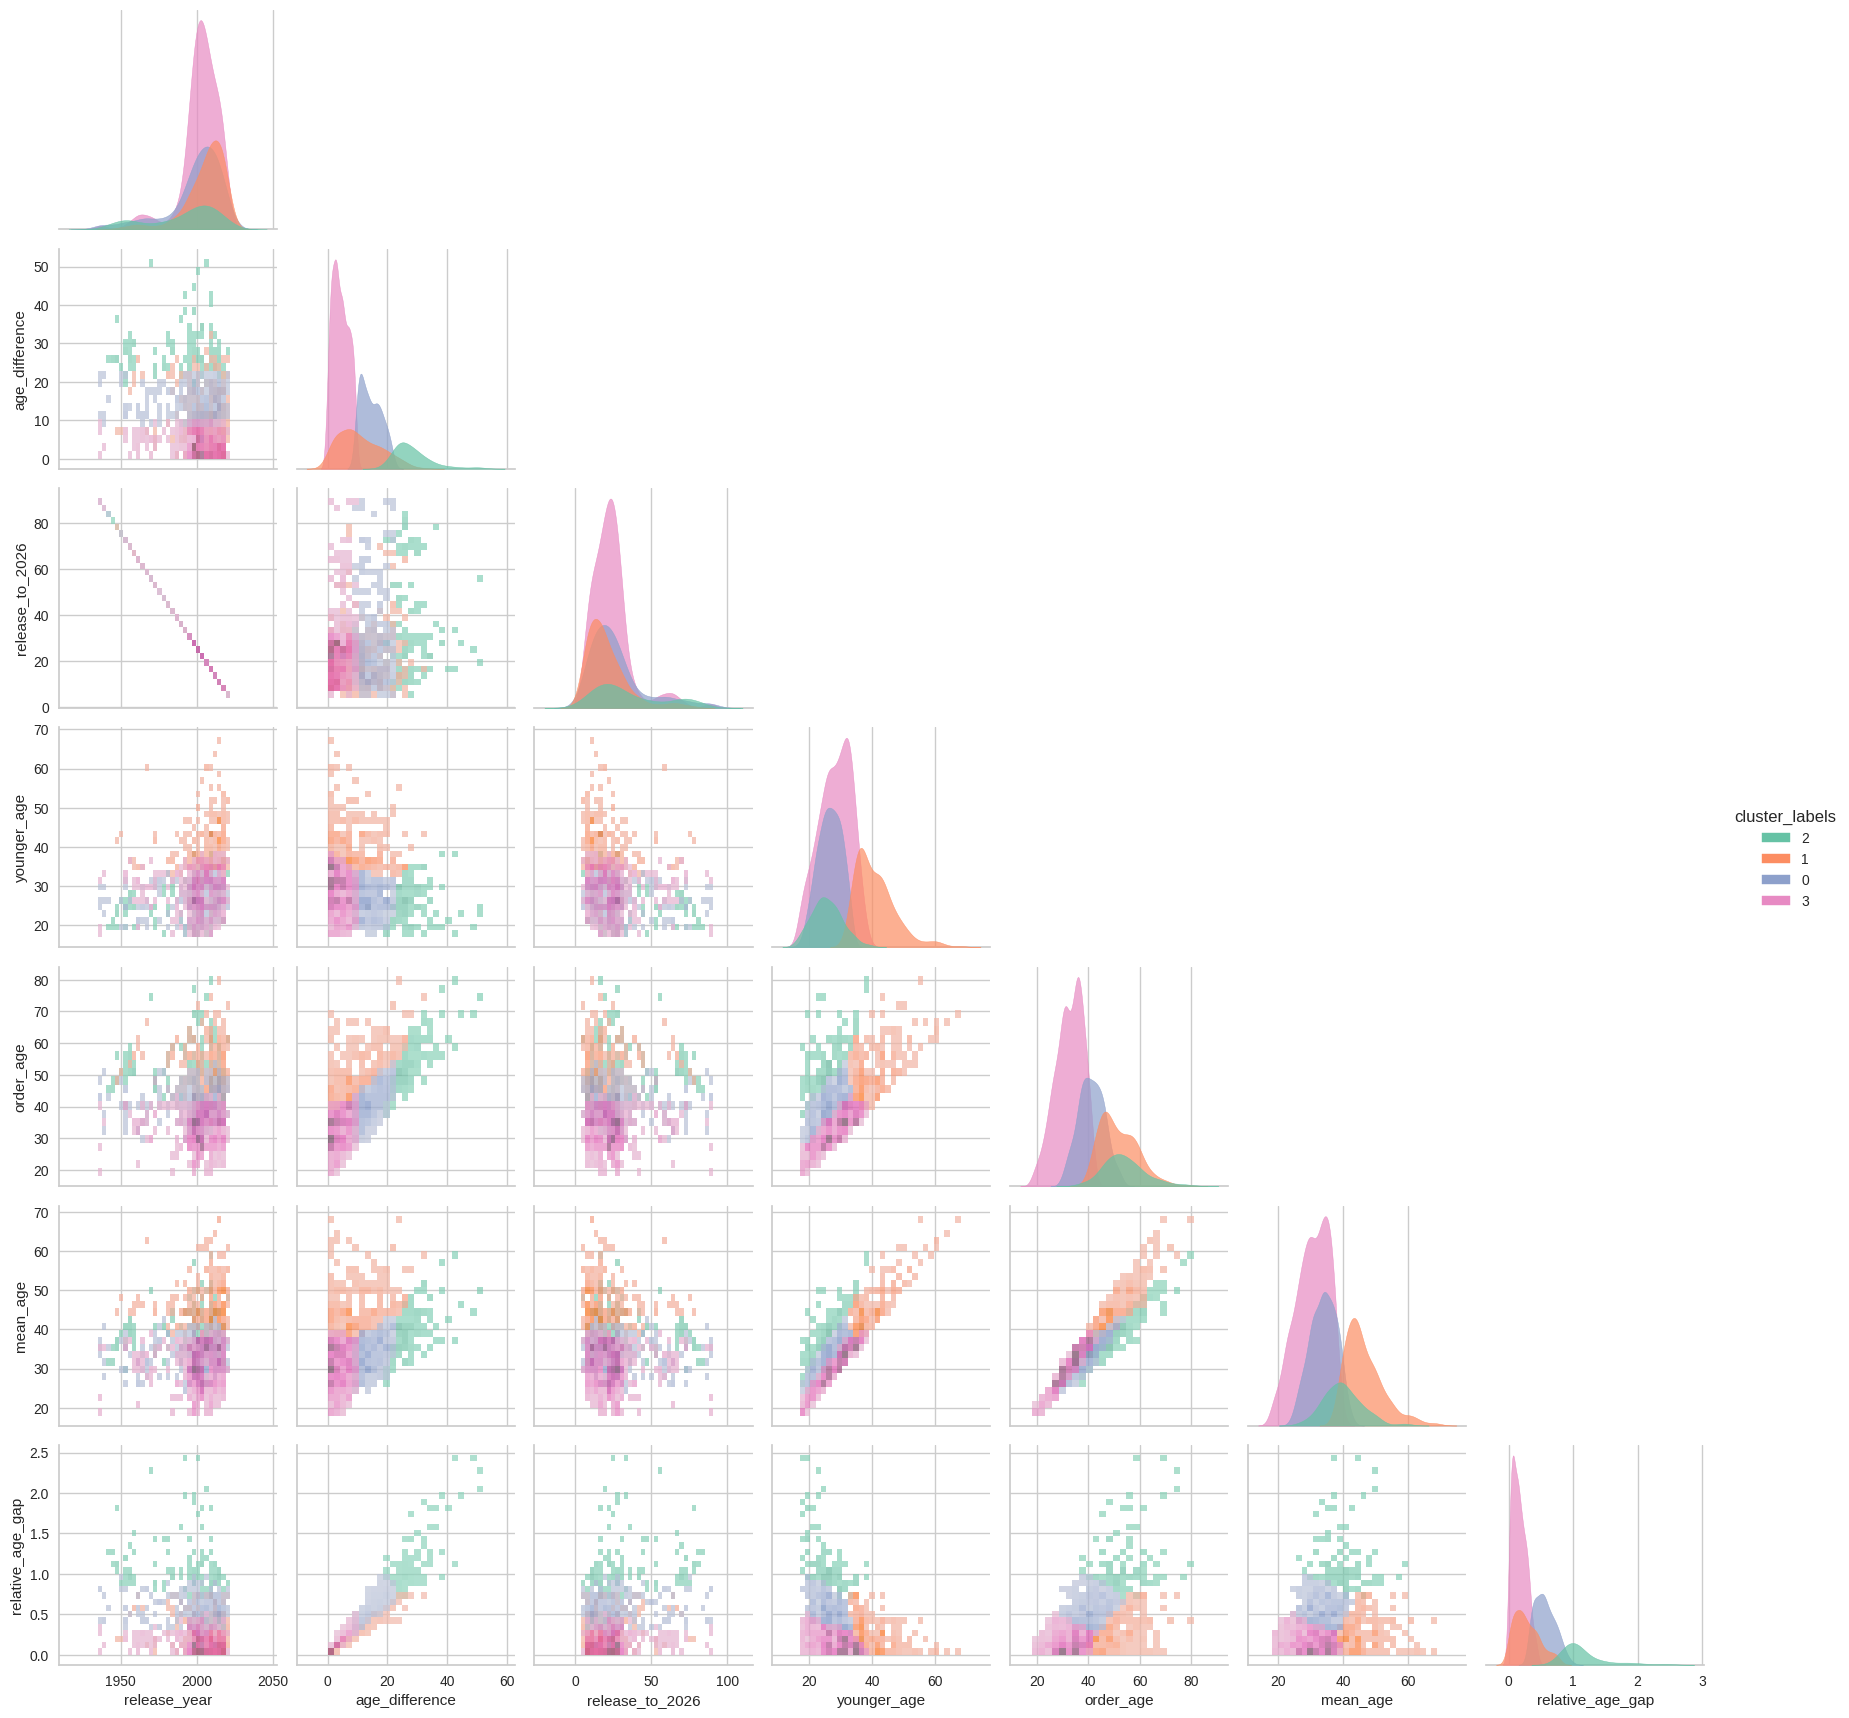

In [ ]:
sns.pairplot(data_k, hue="cluster_labels", kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

In [ ]:
data_k

,release_year,age_difference,release_to_2026,younger_age,order_age,older_gender,mean_age,relative_age_gap,cluster_labels
0,1971,52,55,23,75,woman,49.0,2.260870,2
1,2006,50,20,24,74,man,49.0,2.083333,2
2,2002,49,24,20,69,man,44.5,2.450000,2
3,1998,45,28,23,68,man,45.5,1.956522,2
4,2010,43,16,38,81,man,59.5,1.131579,2
...,...,...,...,...,...,...,...,...,...
1150,2013,0,13,23,23,same_age,23.0,0.000000,3
1151,2006,0,20,42,42,same_age,42.0,0.000000,1
1152,2019,0,7,30,30,same_age,30.0,0.000000,3
1153,2007,0,19,21,21,same_age,21.0,0.000000,3


/tmp/ipython-input-1587560851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_k, x='cluster_labels', y="mean_age", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='mean_age'>

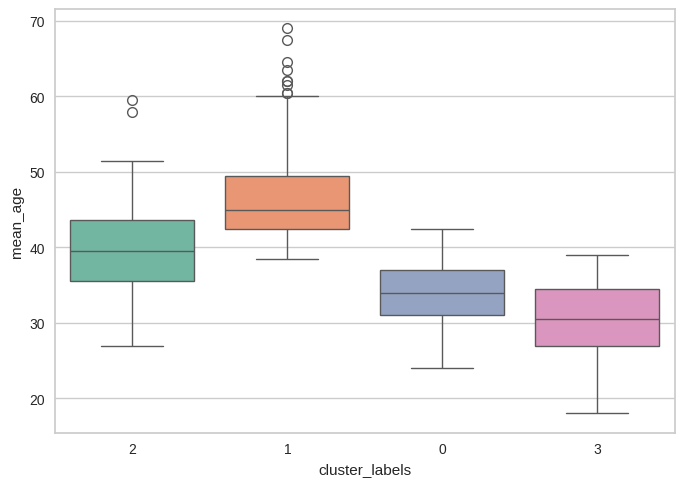

In [ ]:
sns.boxplot(data=data_k, x='c', y="mean_age", palette="Set2")

/tmp/ipython-input-988000534.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_k, x='cluster_labels', y="relative_age_gap", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='relative_age_gap'>

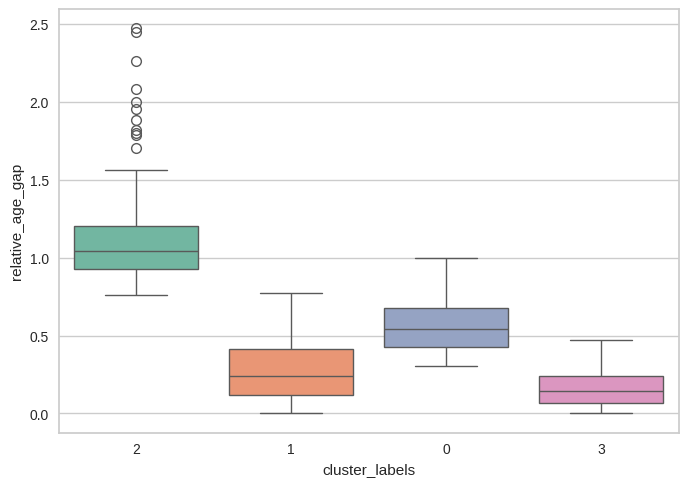

In [ ]:
sns.boxplot(data=data_k, x='cluster_labels', y="relative_age_gap", palette="Set2")

/tmp/ipython-input-21855133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_k, x='cluster_labels', y="order_age", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='order_age'>

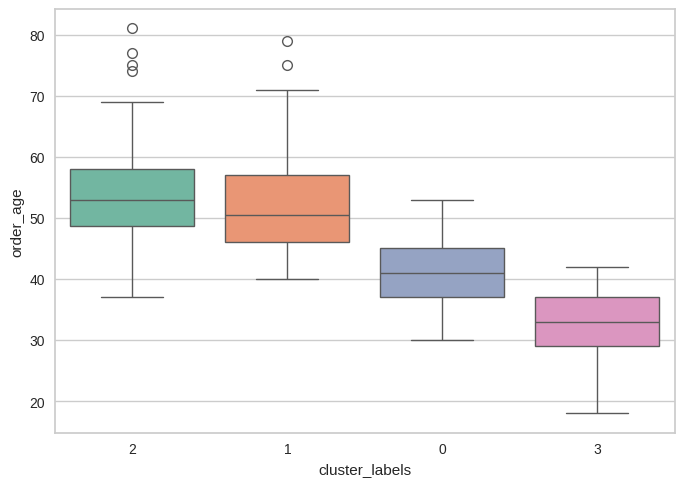

In [ ]:
sns.boxplot(data=data_k, x='cluster_labels', y="order_age", palette="Set2")

/tmp/ipython-input-4185477104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_k, x='cluster_labels', y="younger_age", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='younger_age'>

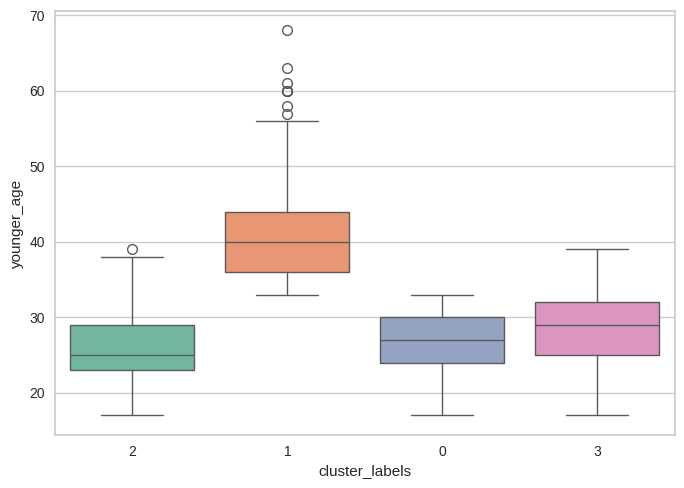

In [ ]:
sns.boxplot(data=data_k, x='cluster_labels', y="younger_age", palette="Set2")

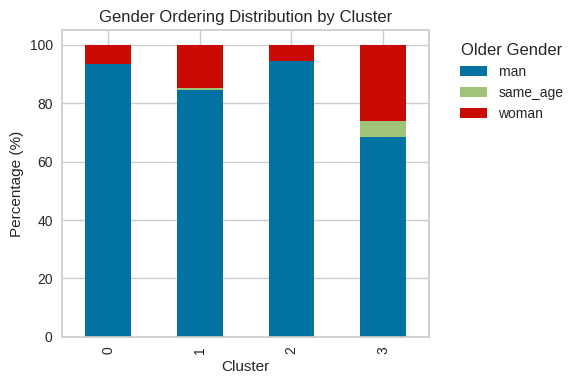

In [ ]:
import matplotlib.pyplot as plt

gender_pct = (
    pd.crosstab(data_k['cluster_labels'], data_k['older_gender'], normalize='index')
    * 100
)

gender_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4)
)

plt.ylabel('Percentage (%)')
plt.xlabel('Cluster')
plt.title('Gender Ordering Distribution by Cluster')
plt.legend(title='Older Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()